# Ciclos de Vapor
## Introducción a la Producción Energética Convencional - Máster de Energías Renovables
### Sara Miquel. Enero 2021


In [1]:
pip install seuif97

Note: you may need to restart the kernel to use updated packages.


In [2]:
from seuif97 import *

## Ejercicio 1: Ciclo de Rankine Ideal

El ciclo Rankine del vapor es ampliamente utilizado en las plantas de potencia para generar electricidad aprovechando la expansión del vapor a alta temperatura y presión. Los componentes del ciclo Rankine (bomba, caldera, turbina y condensador) son dispositivos de flujo estacionario.

In [3]:
# Datos del enunciado
P1 = 8 
P2 = 0.008 
X1=1
Wcycle = 100000
# W cycle = 100 KW; W cycle = 100000 MW
# Entalpía,h (KJ/kg);   Entropía,S (KJ/Kg·K);   Temperatura, T (ºC);   Presión, P (MPa);   Calidad, X

Se calculan los siguientes parámetros: 
a) Cálculo de todos los estados del ciclo
b) El rendimiento térmico en % (ηth)
c) El ratio de trabajo de retorno en % (back work ratio, bwr)
d) El flujo másico de vapor en kg/s (ṁ)
e) Los calores intercambiados en MW (Qin y Qout)
f) Los trabajos de la turbina y la bomba en MW (Wp y Wt)
g) (Opcional) Dibujo del ciclo de vapor

In [4]:
# Estados termodinámicos del proceso del ciclo ideal

# Estado 1: X1=1; P1= 8
T1 = px2t(P1,X1) 
h1 = px2h(P1,X1) 
S1 = px2s(P1,X1) 

# Estado 2: S2=S1=5.74; P2= 0.008
S2=S1
T2 = ps2t(P2,S2)
h2 = ps2h(P2,S2)
X2 = ps2x(P2,S2)
V2 = ps2v(P2,S2)

# Estado 3: T3=T2=41.510052; X3=0
T3=T2
X3 = 0
P3 = tx2p(T3,X3)
h3 = tx2h(T3,X3)
S3 = tx2s(T3,X3)
V3 = tx2v(T3,X3)

# Estado 4: S4=S3=0.59253; P4=P1=8
S4=S3
P4=P1
T4 = ps2t(P4,S4)
h4 = ps2h(P4,S4)
X4 = ps2x(P4,S4)
V4 = ps2v(P4,S4)

# Estado 5
T5i = px2t(P1,0)
S5i = px2s(P1,0)


In [5]:
# Cálculo del rendimiento
m = Wcycle/((h1-h2)-(h4-h3))
Wt = m * (h1-h2)
Wp = m * (h4 - h3)
Qin = m * (h4-h1)
Qout = m * (h3-h2)
Rendimiento = (abs((Wt-Wp)/Qin)*100)
bwr = (Wp/Wt)*100 # ratio de trabajo de retorno
WcycleW = Qin - Qout # Para calcular las potencias, hace falta hacer el cálculo del flujo
Qout = m * (h3-h2)
m = Wcycle/((h1-h2)-(h4-h3)) # Diferencias entre turbina - bomba
Qout = abs(m * (h3-h2)) # en MW
Qin = abs(m * (h4-h1))
Wt = m * (h1-h2) # En MW
Wp = m * (h4 - h3)

In [6]:
print( 'Estado 1')
print ('T1 =', T1, 'ºC')
print ('h1 =',h1,'kJ/kg')
print ('S1 =',S1,'kJ/kg·K')

print('Estado 2')
print ('T2 =',T2)
print ('h2 =',h2)
print ('X2 =',X2)
print ('V2 =',V2, 'm^3/kg')

print('Estado 3')
print ('P3 =',P3)
print ('h3 =',h3)
print ('S3 =',S3)
print ('V3 =',V3)

print('Estado 4')
print ('T4 =',T4)
print ('h4 =',h4)
print ('X4 =',X4)
print ('V4 =',V4)

print('Estado 5')
print('S5i =',S5i)
print('T5i =',T5i)

print ('El rendimiento térmico (%) es de:',Rendimiento)
print('bwr (%) =',bwr)
print ('bwr, es la variable que nos define la cantidad consumida de la total producida')
print ('m (kg/s)=',m)
print ('Qout (MW) =', Qout)
print ('Qin (MW) =', Qin)
print ('Wt (MW) =', Wt)
print ('Wp (MW) =', Wp)


Estado 1
T1 = 295.00912125631703 ºC
h1 = 2758.611080680434 kJ/kg
S1 = 5.744848808940075 kJ/kg·K
Estado 2
T2 = 41.51005270424139
h2 = 1795.0770367371815
X2 = 0.6748393810242206
V2 = 12.214543575697041 m^3/kg
Estado 3
P3 = 0.007999999999999962
h3 = 173.8517685972624
S3 = 0.592531583591964
V3 = 0.0010084729266462307
Estado 4
T4 = 41.75196883675659
h4 = 181.89778626716353
X4 = 0.0
V4 = 0.001005058770876371
Estado 5
S5i = 3.207651008044679
T5i = 295.00912125631703
El rendimiento térmico (%) es de: 37.08165857431649
bwr (%) = 0.8350527644018554
bwr, es la variable que nos define la cantidad consumida de la total producida
m (kg/s)= 104.65855902980353
Qout (MW) = 169675.10042623078
Qin (MW) = 269675.10042623075
Wt (MW) = 100842.0846152602
Wp (MW) = 842.0846152601885


#### Representación del ciclo de vapor ideal
El diagrama T-s (temperatura y entropía) de un ciclo Rankine ideal está formado por cuatro procesos: dos isoentrópicos y dos isobáricos. La bomba y la turbina son los equipos que operan según procesos isoentrópicos (adiabáticos e internamente reversibles). La caldera y el condensador operan sin pérdidas de carga y por tanto sin caídas de presión. Los estados principales del ciclo quedan definidos por los números del 1 al 4 en el diagrama T-s (1: vapor sobrecalentado; 2: mezcla bifásica de título elevado o vapor húmedo; 3: líquido saturado; 4: líquido subenfriado).

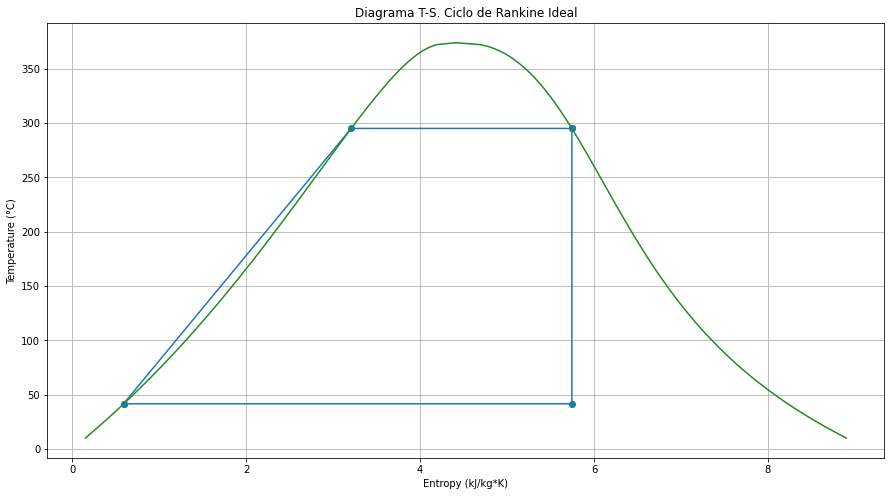

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15.0,8.0))

S_ideal=[S1,S2,S3,S4,S5i,S1]
T_ideal=[T1,T2,T3,T4,T5i,T1]

plt.plot(S_ideal, T_ideal, 'o-')
plt.xlabel('Entropy (kJ/kg*K)')
plt.ylabel('Temperature (°C)')
plt.title('Diagrama T-S. Ciclo de Rankine Ideal')
plt.grid()

# saturated vapor and liquid entropy lines 
npt = np.linspace(10,647.096-273.15,200) # range of temperatures
svap = [s for s in [tx2s(t, 1) for t in npt]]
sliq = [s for s in [tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'forestgreen')
plt.plot(sliq, npt, 'forestgreen')

## Ejercicio 2: Ciclo de Rankine con irreversibilidades

Al implementar el ciclo ideal Rankine en una instalación de producción de potencia se presentan desviaciones de las magnitudes debido a la irreversibilidad de los procesos y equipos. Las irreversibilidades se clasifican en dos tipos: Irreversibilidades internas y externas. El trabajo real necesario para aumentar la presión del líquido en la bomba será mayor que el ideal (isentrópico) mientras que el trabajo real de expansión obtenido en la turbina será menor que el ideal debido a las pérdidas internas.

In [19]:
# Datos del enunciado  Nota: Se utiliza la 'r' de real

RendT=0.85
RendP=0.85

# Estado 2 Real

h2r = h1 - RendT*(h1-h2)
T2r=T2 # A partir de estos datos calculamos el resto
P2r = th2p(T2, h2r)
S2r = th2s(T2, h2r)
V2r = th2v(T2, h2r)
X2r = th2x(T2, h2r)

# Estado 4 Real
h4r = h3 + ((h4-h3)/RendP) # A partir de la entalpía y presión (igual que el ideal), calculamos el resto
P4r = P4
T4r = ph2t(P4,h4r)
S4r = ph2s(P4,h4r)
V4r = ph2v(P4,h4r)
X4r = ph2x(P4,h4r)

# Se calcula el rendimiento real, El back work ratio, el flujo másico de vapor, los calores intercambiados en MW y 
# los los trabajos de la turbina y la bomba en MW (Wp y Wt)
mr = Wcycle / ((h1-h2r) - (h4r-h3)) # Diferencia turbina - bomba
Qoutr = (mr * (h2r - h3)) / 1000 
Qinr = (mr * (h1 - h4r)) / 1000
Wtr = (mr * (h1 - h2r)) / 1000 
Wpr = (mr * (h4r - h3)) / 1000
Rendimientor = (Wtr - Wpr) / Qinr * 100

In [20]:
print('ESTADO 2')
print('Entalpía estado 2 (h2r) =',h2r) 
print('Presión estado 2 (P2r) =',P2r)
print('Entropía estado 2 (S2r) =',S2r)
print('Vol estado 2 (V2r) =',V2r)
print('X2r =',X2r)

print('ESTADO 4')
print ('Entalpía estado 4 (h4r) =',h4r) 
print('Presión estado 4 (P4r) =',P4r)
print('Temperatura estado 4 (T4r) =',T4r)
print('Entropía estado 4 (S4r) =',S4r)
print('Vol estado 4 (V4r) =',V4r)
print('X4r =',X4r)

print ('mr = ',mr, 'kg/s')
print ('Calor especifico en el condensador, Qoutr =', Qoutr, 'MW')
print ('Calor especifico en la caldera, Qinr =', Qinr, 'MW')
print ('Trabajo especifico de la turbina, Wtr =', Wtr, 'MW')
print ('Trabajo especifico de la bomba,  Wpr =',  Wpr, 'MW')
print ('Rendimiento térmico =',Rendimientor, '%') 

ESTADO 2
Entalpía estado 2 (h2r) = 1939.6071433286693
Presión estado 2 (P2r) = 0.007999999999999962
Entropía estado 2 (S2r) = 6.204171132868009
Vol estado 2 (V2r) = 13.303364213366768
X2r = 0.7350004268630066
ESTADO 4
Entalpía estado 4 (h4r) = 183.31767173832256
Presión estado 4 (P4r) = 8
Temperatura estado 4 (T4r) = 42.093300748692855
Entropía estado 4 (S4r) = 0.5970381178051598
Vol estado 4 (V4r) = 0.001005196435764367
X4r = 0.0
mr =  123.52724118453493 kg/s
Calor especifico en el condensador, Qoutr = 218.11889004733536 MW
Calor especifico en la caldera, Qinr = 318.11889004733536 MW
Trabajo especifico de la turbina, Wtr = 101.16929690033517 MW
Trabajo especifico de la bomba,  Wpr = 1.1692969003351843 MW
Rendimiento térmico = 31.43478841672062 %


#### Representación ciclo real

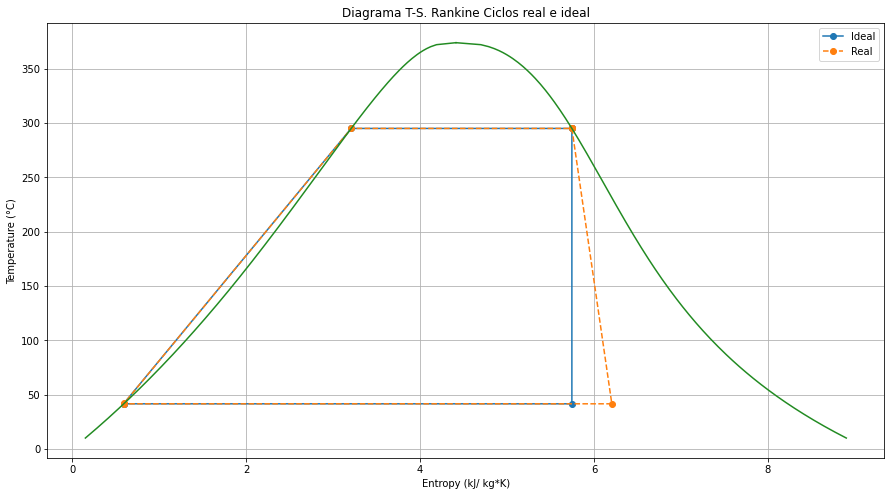

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15.0,8.0))
 
S_ideal=[S1,S2,S3,S4,S5i,S1]
T_ideal=[T1,T2,T3,T4,T5i,T1]      
S_real=[S1,S2r,S3,S4r,S5i,S1]
T_real=[T1,T2r,T3,T4r,T5i,T1]

plt.plot(S_ideal, T_ideal, 'o-')
plt.plot(S_real, T_real, 'o--')
plt.legend(('Ideal','Real'))
plt.xlabel('Entropy (kJ/ kg*K)')
plt.ylabel('Temperature (°C)')
plt.title('Diagrama T-S. Rankine Ciclos real e ideal')
plt.grid()

# Representación de la línea
npt = np.linspace(10,647.096-273.15,200) # range of temperatures
svap = [s for s in [tx2s(t, 1) for t in npt]]
sliq = [s for s in [tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'forestgreen')
plt.plot(sliq, npt, 'forestgreen')

 ## Ejercicio 3: Ciclo de Rankine con sobrecalentamiento

La temperatura promedio a la que el calor es transferido hacia el vapor puede ser  incrementada sin aumentar la presión de la caldera, gracias al sobrecalentamiento  del vapor a altas temperaturas. El sobrecalentamiento del vapor a temperaturas más altas tiene otro efecto muy conveniente: disminuye el contenido de humedad del vapor a la salida de la turbina

In [25]:
# Datos del enunciado. Nota: Se utiliza la 's' de sobrecalentamiento
P1s = 8 
P2s = 0.008 
T1s = 450 # (ºC)
Wcycles = 100000
RendTs = 0.85
RendPs = 0.85

In [26]:
# Cálculo de los estados del ciclo

# ESTADO 1, partiendo de los datos de P1s y T1s

h1s = pt2h(P1s,T1s)
S1s = pt2s(P1s,T1s)
V1s = pt2v(P1s,T1s)
X1s = pt2x(P1s,T1s)

# ESTADO 2; Primero se calcula el ideal (Nota: se utiliza 'i' de ideal)

S2is=S1s
T2is = ps2t(P2s,S2is)
h2is = ps2h(P2s,S2is)
X2is = ps2x(P2s,S2is)
V2is = ps2v(P2s,S2is)

# ESTADO 2 REAL; A partir de (T2si=T2sr)

h2rs = h1s - RendTs*(h1s-h2is)
T2rs=T2is
P2rs = th2p(T2is, h2rs)
S2rs = th2s(T2is, h2rs)
V2rs = th2v(T2is, h2rs)
X2rs = th2x(T2is, h2rs)

# ESTADO 3

T3s=T2is
X3s=0
P3s = tx2p(T3s,X3s)
h3s = tx2h(T3s,X3s)
S3s = tx2s(T3s,X3s)
V3s = tx2v(T3s,X3s)

# ESTADO 4 (Ideal)

S4s=S3s
P4s=P1s
T4is = ps2t(P4s,S4s)
h4is = ps2h(P4s,S4s)
X4is = ps2x(P4s,S4s)
V4is = ps2v(P4s,S4s)

# ESTADO 4 REAL. Nota: 'r' de real. Obtenemos la entalpía real y la presión es la misma que en el estado 4

h4rs = h3s + ((h4is-h3s)/RendPs) 
T4rs = ph2t(P4s,h4rs)
S4rs = ph2s(P4s,h4rs)
V4rs = ph2v(P4s,h4rs)
X4rs = ph2x(P4s,h4rs)

# ESTADO 5

T5s=T1
X5s=0
S5s = tx2s(T5s,X5s)
P5s = tx2p(T5s,X5s)
h5s = tx2h(T5s,X5s)
V5s = tx2v(T5s,X5s)

In [27]:
print('ESTADO 1:')
print('h1s =',h1s)
print('S1s =',S1s)
print('V1s =',V1s)
print('X1s =',X1s)
print('P1s =',P1s)
print('T1s =',T1s)

print ('ESTADO 2 IDEAL:')
print('T2is =',T2is)
print('h2is =',h2is)
print('X2is =',X2is)
print('V2is =',V2is, 'm^3/kg')
print('S2is =',S2is)
print('P2s =',P2s)

print ('ESTADO 2 REAL:')
print ('h2rs',h2rs)
print('P2rs =',P2rs)
print('S2rs =',S2rs)
print('V2rs =',V2rs)
print('X2rs =',X2rs)
print('T2rs =',T2rs)

print('ESTADO 3')
print('P3s =',P3s)
print('h3s =',h3s)
print('S3s =',S3s)
print('V3s =',V3s)
print('T3s =',T3s)

print('ESTADO 4 ideal:')
print ('T4is =',T4is)
print ('h4is =',h4is)
print ('X4is =',X4is)
print ('V4is =',V4is)
print('S4s =',S4s)
print('P4s =', P4s) 

print('ESTADO 4 REAL:')
print ('h4rs =',h4rs) 
print('T4rs =',T4rs)
print('S4rs =',S4rs)
print('V4rs =',V4rs)
print('X4rs =',X4rs)
print('P4s =', P4s) 

print('ESTADO 5')
print('S5s = ',S5s)
print('T5s =',T5s)

ESTADO 1:
h1s = 3273.2340290678903
S1s = 6.55767674925585
V1s = 0.03819698603253424
X1s = 1.0
P1s = 8
T1s = 450
ESTADO 2 IDEAL:
T2is = 41.51005270424139
h2is = 2050.8410236685245
X2is = 0.781301828915292
V2is = 14.141347021090214 m^3/kg
S2is = 6.55767674925585
P2s = 0.008
ESTADO 2 REAL:
h2rs 2234.1999744784293
P2rs = 0.007999999999999962
S2rs = 7.140398656720041
V2rs = 15.5226855840485
X2rs = 0.8576254856590433
T2rs = 41.51005270424139
ESTADO 3
P3s = 0.007999999999999962
h3s = 173.8517685972624
S3s = 0.592531583591964
V3s = 0.0010084729266462307
T3s = 41.51005270424139
ESTADO 4 ideal:
T4is = 41.75196883675659
h4is = 181.89778626716353
X4is = 0.0
V4is = 0.001005058770876371
S4s = 0.592531583591964
P4s = 8
ESTADO 4 REAL:
h4rs = 183.31767173832256
T4rs = 42.093300748692855
S4rs = 0.5970381178051598
V4rs = 0.001005196435764367
X4rs = 0.0
P4s = 8
ESTADO 5
S5s =  3.2076510080446785
T5s = 295.00912125631703


In [28]:
# Se calcula el rendimiento térmico en % (ηth), el ratio de trabajo de retorno en % (bwr), 
# el flujo másico de vapor en kg/s (ṁ), los calores intercambiados en MW (Qin y Qout), 
# los trabajos de la turbina y la bomba en MW (Wp y Wt).

mrs = Wcycle/((h1s-h2rs)-(h4rs-h3s)) # Diferencia turbina - bomba
Qoutrs = (mrs * (h2rs-h3s))/1000
Qinrs = (mrs * (h1s-h4rs))/1000
Wtrs = (mrs * (h1s-h2rs))/1000
Wprs = (mrs * (h4rs - h3s))/1000
Rendimientors = (Wtrs-Wprs)/Qinrs *100

In [29]:
print('Wcycle =', Wcycle,'MW')
print ('mrs =',mrs, 'kg/s')
print ('Qoutrs =', Qoutrs, 'MW')
print ('Qinrs =', Qinrs,'MW' )
print ('Wtrs', Wtrs, 'MW')
print ('Wprs', Wprs, 'MW')
print ('Rendimiento térmico  =',Rendimientors, '%')

Wcycle = 100000 MW
mrs = 97.1281015825126 kg/s
Qoutrs = 200.11770983617356 MW
Qinrs = 300.11770983617356 MW
Wtrs 100.91940520185511 MW
Wprs 0.9194052018551155 MW
Rendimiento térmico  = 33.32025959234042 %


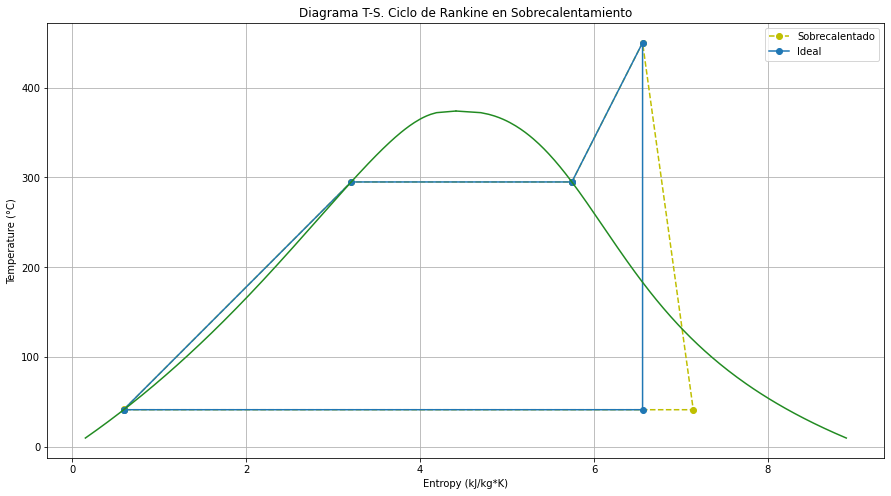

In [31]:
# Se representa el ciclo de vapor en sobrecalentamiento

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15.0,8.0))
S_ideal_calentado=[S1,S1s,S2is,S3s,S4s,S5i,S1]
T_ideal_calentado=[T1,T1s,T2is,T3s,T4is,T5i,T1]    
S_calentado=[S1,S1s,S2rs,S3s,S4rs,S5s,S1]
T_calentado=[T1,T1s,T2rs,T3s,T4rs,T5s,T1]

plt.plot(S_calentado, T_calentado, 'yo--')
plt.plot(S_ideal_calentado, T_ideal_calentado, 'o-')
plt.legend(('Sobrecalentado','Ideal'))
plt.xlabel('Entropy (kJ/kg*K)')
plt.ylabel('Temperature (°C)')
plt.title('Diagrama T-S. Ciclo de Rankine en Sobrecalentamiento')
plt.grid()

# Representación de la línea
npt = np.linspace(10,647.096-273.15,200) # rango de temperaturas
svap = [s for s in [tx2s(t, 1) for t in npt]]
sliq = [s for s in [tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'forestgreen')
plt.plot(sliq, npt, 'forestgreen')



## Ejercicio 4: Ciclo de Rankine con recalentamiento

El ciclo Rankine con recalentamiento puede ayudar a elevar mínimamente la eficiencia del ciclo, pero se usa para alargar el tiempo de vida de la turbina. Idealmente podríamos usar una cantidad infinita de recalentamientos para continuar elevando la eficiencia pero en la practica solo se usan dos o tres, ya que la ganancia de trabajos es muy pequeña.

In [32]:
# Datos del enunciado:

t1 = 500
p1 = 10
p2 = 0.8
t3 = 460
p4 = 0.008
x5 = 0
w_cycle = 200
r_t1 = 0.91
r_t2 = 0.93
r_p = 0.88

In [33]:
# Definición de los estados

import seuif97 as sf

class State_Pyromat(object):
    def __init__(self, numero='', descripcion='', fluido=None, **kwargs):
        self.numero = numero
        self.descripcion = descripcion
        self.kwargs = kwargs
        if fluido is None:
            self.fluido = pm.get('mp.H2O')
        else:
            self.fluido = fluido
        self.all_keys = ('T', 'p', 's', 'h', 'x')
        for kwarg, val in kwargs.items():
            setattr(self, kwarg, val) ## Este bucle está haciendo: self.t=480
        self.calcular_propiedades()
 
    def __repr__(self):
        return f'Estado {self.numero} - {self.descripcion}: P = {self.p:.4f} MPa, T = {self.T:.2f} ºC,'\
               f'x = {self.x:.2f} p.u., h = {self.h:.2f} KJ/kg, s = {self.s:.2f} KJ/kg·K'
            
    def calcular_propiedades(self):
        keys = [k for k in self.kwargs.keys()]
        unknown_keys = list(set(self.all_keys).difference(keys))
        function = ''.join(keys)
        values = [getattr(self, k) for k in keys]
        for var in unknown_keys:           
            setattr(self, var, getattr(self.fluido, var)(**self.kwargs)[0]) ### para PyroMat
            

class State(object):
    '''Estados para SEUIF97'''
    def __init__(self, numero='', descripcion='', fluido=None, **kwargs):
        self.numero = numero
        self.descripcion = descripcion
        self.kwargs = kwargs
        self.all_keys = ('t', 'p', 's', 'h', 'x')
        for kwarg, val in kwargs.items():
            setattr(self, kwarg, val)
        self.calcular_propiedades()
 
    def __repr__(self):
        return f'Estado {self.numero} - {self.descripcion}: P = {self.p:.4f} MPa, T = {self.t:.2f} ºC,'\
               f'x = {self.x:.2f} p.u., h = {self.h:.2f} KJ/kg, s = {self.s:.2f} KJ/kg·K'
            
    def calcular_propiedades(self):
        keys = [k for k in self.kwargs.keys()] # Lo ponemos dentro una lista (cogemos solo el argumento kawargs)
        unknown_keys = list(set(self.all_keys).difference(keys)) ## Diferencia entre self.all_keys = ('t','p','s','h','x') y keys.Siendo una lista
        function = ''.join(keys)
        values = [getattr(self, k) for k in keys]
        
        for var in unknown_keys:
            try:
                setattr(self, var, getattr(sf, f'{function}2{var}')(*values)) ## Estaran todas las variables que no hayamos utilizado
            except AttributeError as e:
                setattr(self, var, getattr(sf, f'{function[::-1]}2{var}')(*values[::-1]))

#### a) Calcular todos los estados 

In [34]:
estado1 = State(1, 'Entrada turbina', t=t1, p=p1)
estado2ideal = State('2i', 'Salida turbina etapa 1 (ideal)', s=estado1.s, p=0.8)
h2r = estado1.h - r_t1*(estado1.h - estado2ideal.h)
estado2 = State(2, 'Salida turbina etapa 1 (real)', h=h2r, p=0.8)
estado3 = State(3, 'Entrada turbina etapa 2', p=estado2.p, t=t3)
estado4ideal = State('4i', 'Salida turbina etapa 2 (ideal)', s=estado3.s, p=p4)
h4r = estado3.h - r_t2*(estado3.h - estado4ideal.h)
estado4 = State(4, 'Salida turbina etapa 2 (real)', h=h4r, p=p4)
estado5 = State(5, 'Entrada bomba', x=x5, t=estado4.t)
estado6ideal = State('6i', 'Salida bomba (ideal)', p=p1, s=estado5.s)
h6r = (estado5.h - estado6ideal.h)/r_p + estado5.h
estado6 = State(6, 'Salida bomba (real)', h=h6r, p=estado6ideal.p)


In [35]:
print(estado1)
print(estado2ideal)
print(estado2)
print(estado3)
print(estado4ideal)
print(estado4)
print(estado5)
print(estado6ideal)
print(estado6)

Estado 1 - Entrada turbina: P = 10.0000 MPa, T = 500.00 ºC,x = 1.00 p.u., h = 3375.06 KJ/kg, s = 6.60 KJ/kg·K
Estado 2i - Salida turbina etapa 1 (ideal): P = 0.8000 MPa, T = 170.41 ºC,x = 0.99 p.u., h = 2740.70 KJ/kg, s = 6.60 KJ/kg·K
Estado 2 - Salida turbina etapa 1 (real): P = 0.8000 MPa, T = 182.20 ºC,x = 1.00 p.u., h = 2797.80 KJ/kg, s = 6.73 KJ/kg·K
Estado 3 - Entrada turbina etapa 2: P = 0.8000 MPa, T = 460.00 ºC,x = 1.00 p.u., h = 3395.16 KJ/kg, s = 7.75 KJ/kg·K
Estado 4i - Salida turbina etapa 2 (ideal): P = 0.0080 MPa, T = 41.51 ºC,x = 0.94 p.u., h = 2427.54 KJ/kg, s = 7.75 KJ/kg·K
Estado 4 - Salida turbina etapa 2 (real): P = 0.0080 MPa, T = 41.51 ºC,x = 0.97 p.u., h = 2495.27 KJ/kg, s = 7.97 KJ/kg·K
Estado 5 - Entrada bomba: P = 0.0080 MPa, T = 41.51 ºC,x = 0.00 p.u., h = 173.85 KJ/kg, s = 0.59 KJ/kg·K
Estado 6i - Salida bomba (ideal): P = 10.0000 MPa, T = 41.81 ºC,x = 0.00 p.u., h = 183.91 KJ/kg, s = 0.59 KJ/kg·K
Estado 6 - Salida bomba (real): P = 10.0000 MPa, T = 36.64 º

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Tc = 647.096 - 273.15  # Critical point temperature (ºC)
Pt = 611.657e-6  # Triple point pressure (MPa)
Tt = 0.01  # Triple point temperature (ºC)
# Plotting vars
isop = np.array([Pt, 0.001, 0.002, 0.005, 0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.0, 2.0, 5.0, 10.0, 20.0, 35.0, 50.0, 100.0])
isoh = np.linspace(200, 3600, 25)


class RankineCycleReheat(object):
    def __init__(self, t1, p1, p2, t3, p4, x5, w_cycle, r_t1, r_t2, r_p):
        self.t1 = t1
        self.p1 = p1
        self.p2 = p2
        self.t3 = t3
        self.p4 = p4
        self.x5 = x5
        self.w_cycle = w_cycle
        self.r_t1 = r_t1
        self.r_t2 = r_t2
        self.r_p = r_p
        self.ordered_states = ['s1', 's2i', 'sc', 's3', 's4i', 's5', 's6i', 'sa', 'sb', 's1']
        self.calcular_todo()

    def fijar_estados(self):
        self.estado1 = State(1, 'Entrada turbina', t=self.t1, p=self.p1)
        self.estado2ideal = State('2i', 'Salida turbina etapa 1 (ideal)', s=self.estado1.s, p=self.p2)
        self.h2r = self.estado1.h - self.r_t1*(self.estado1.h - self.estado2ideal.h)
        self.estado2 = State(2, 'Salida turbina etapa 1 (real)', h=self.h2r, p=self.p2)
        self.estado3 = State(3, 'Entrada turbina etapa 2', p=self.estado2.p, t=self.t3)
        self.estado4ideal = State('4i', 'Salida turbina etapa 2 (ideal)', s=self.estado3.s, p=self.p4)
        self.h4r = self.estado3.h - self.r_t2*(self.estado3.h - self.estado4ideal.h)
        self.estado4 = State(4, 'Salida turbina etapa 2 (real)', h=self.h4r, p=self.p4)
        self.estado5 = State(5, 'Entrada bomba', x=self.x5, t=self.estado4.t)
        self.estado6ideal = State('6i', 'Salida bomba (ideal)', p=self.p1, s=self.estado5.s)
        self.h6r = (self.estado6ideal.h - self.estado5.h)/self.r_p + self.estado5.h
        self.estado6 = State(6, 'Salida bomba (real)', h=self.h6r, p=self.estado6ideal.p)
        self.states_dict = {'s1':self.estado1, 's2i':self.estado2ideal, 's2':self.estado2, 's3':self.estado3, 
                            's4i':self.estado4ideal, 's4':self.estado4, 's5':self.estado5, 's6i':self.estado6ideal,
                            's6':self.estado6}
        self.fijar_estados_intermedios()
        
    def hacer_df(self):
        df = pd.DataFrame([])
        for k, st in self.states_dict.items():
            for var in st.all_keys:
                df.loc[k, var] = getattr(st, var)
        return df
    
    def calcular_todo(self):
        self.fijar_estados()
        self.calcular_entalpias()
        self.calcular_flujo_masico()
        self.calcular_potencias()
        self.calcular_rendimientos()
#         self.print_values()
    
    def calcular_entalpias(self):
        self.w_t1 = self.estado1.h - self.estado2.h
        self.w_t2 = self.estado3.h - self.estado4.h
        self.w_p = self.estado6.h - self.estado5.h
        self.q_in_caldera = self.estado1.h - self.estado6.h
        self.q_in_recalentamiento = self.estado3.h - self.estado2.h
        self.q_in = self.q_in_caldera + self.q_in_recalentamiento
        self.q_out = self.estado4.h - self.estado5.h
        
    def calcular_flujo_masico(self):
        self.mass_flow = (self.w_cycle * 1e3) / (self.w_t1 + self.w_t2 - self.w_p)
        
    def calcular_potencias(self):
        self.w_t1_mw = self.w_t1 * self.mass_flow / 1e3
        self.w_t2_mw = self.w_t2 * self.mass_flow / 1e3
        self.w_p_mw = self.w_p * self.mass_flow / 1e3
        self.q_in_mw = self.q_in * self.mass_flow / 1e3
        self.q_out_mw = self.q_out * self.mass_flow / 1e3
        
    def calcular_rendimientos(self):
        self.r_th = (self.w_t1_mw + self.w_t2_mw - self.w_p_mw) / self.q_in_mw
        self.bwr = self.w_p_mw / (self.w_t1_mw + self.w_t2_mw)
        
    def print_values(self):
        print(
            f'Qin = {self.q_in:.2f} KJ/kg, Qout = {self.q_out:.2f}  KJ/kg, Wt1 = {self.w_t1:.2f} KJ/kg, '
            f'Wt2 = {self.w_t2:.2f} KJ/kg, Wp = {self.w_p:.2f} KJ/kg')
        print(f'Qin = {self.q_in_mw:.2f} MW, Qout = {self.q_out_mw:.2f} MW, Wt1 = {self.w_t1_mw:.2f} MW, '
              f'Wt2 = {self.w_t2_mw:.2f} MW, Wp = {self.w_p_mw:.2f} MW')
        print(f'Thermal efficiency = {self.r_th:.3f}, Back work ratio = {self.bwr:.3f}')
    
    def fijar_estados_intermedios(self):
        self.estado_a = State('a', p=self.estado6.p, x=0)
        self.states_dict['sa'] = self.estado_a
        # if self.s1.t != self.sa.t:
        self.estado_b = State('b', t=self.estado_a.t, x=1)
        self.states_dict['sb'] = self.estado_b
        self.estado_c = State('c', t=self.estado2.t, x=1)
        self.states_dict['sc'] = self.estado_c
    
    def plot_water_curve(self, ax=None, quality=False, isobars=False, isenthalpic=False, show=False):
        if ax is None:
            fig, ax = plt.subplots(1,1)
        T = np.linspace(0.01, Tc, 100)
        for x in np.array([0, 1.0]):
            S = np.array([sf.tx2s(t, x) for t in T])
            ax.plot(S, T, 'k', lw=1.0)
        if quality:
            for x in np.linspace(0.1, 0.9, 11):
                S = np.array([sf.tx2s(t, x) for t in T])
                ax.plot(S, T, 'k--', lw=0.2)
        if isobars:
            for p in isop:
                T = np.array([sf.ph2t(p, h) for h in isoh])
                S = np.array([sf.ph2s(p, h) for h in isoh])
                ax.plot(S, T, 'b', lw=0.2)
        if isenthalpic:
            for h in isoh:
                T = np.array([sf.ph2t(p, h) for p in isop])
                S = np.array([sf.ph2s(p, h) for p in isop])
                ax.plot(S, T, 'green', lw=0.2)
        if show:
            plt.show()
        return ax
    
    def plot_cycle(self, water_curve=True, ax=None, **kwargs):
        if water_curve:
            ax = self.plot_water_curve(**kwargs)
        if ax is None:
            fig, ax = plt.subplots(1, 1)
        s = []
        t = []
        for k in self.ordered_states:
            s.append(self.states_dict[k].s)
            t.append(self.states_dict[k].t)

        ax.plot(s, t, 'ro-')
        if self.r_t1 < 1.0:
            real_turb = ['s1', 's2', 's2i']
            s_t = []
            t_t = []
            for k in real_turb:
                s_t.append(self.states_dict[k].s)
                t_t.append(self.states_dict[k].t)
            ax.plot(s_t, t_t, 'ro--')
        if self.r_t2 != 1.0:
            real_turb = ['s3', 's4', 's4i']
            s_t = []
            t_t = []
            for k in real_turb:
                s_t.append(self.states_dict[k].s)
                t_t.append(self.states_dict[k].t)
            ax.plot(s_t, t_t, 'ro--')
        if self.r_p != 1.0:
            real_pump = ['s5', 's6', 'sa']
            s_p = []
            t_p = []
            for k in real_pump:
                s_p.append(self.states_dict[k].s)
                t_p.append(self.states_dict[k].t)
            ax.plot(s_p, t_p, 'ro--')

In [37]:
# Cálculo de los apartados:  b) Rendimiento térmico del ciclo en % (ηth); c) Flujo másico de vapor en kg/s (ṁ); 
# d) Si el agua de refrigeración entra en el condensador a 15 ºC y sale a 35 ºC, 
# ¿cuál es el flujo másico del agua de refrigeración en el condensador?
# Tabla con los datos calculados +:

if __name__ == '__main__':
    t1 = 500
    p1 = 10
    p2 = 0.8
    t3 = 460
    p4 = 0.008
    x5 = 0
    w_cycle = 200
    r_t1 = 0.91
    r_t2 = 0.93
    r_p = 0.88
    ciclo = RankineCycleReheat(t1, p1, p2, t3, p4, x5, w_cycle, r_t1, r_t2, r_p)
    df = ciclo.hacer_df()
    print(df)

              t          p         s            h         x
s1   500.000000  10.000000  6.599323  3375.058442  1.000000
s2i  170.413511   0.800000  6.599323  2740.704098  0.986520
s2   182.198448   0.800000  6.727177  2797.795989  1.000000
s3   460.000000   0.800000  7.754835  3395.164792  1.000000
s4i   41.510053   0.008000  7.754835  2427.538081  0.938103
s4    41.510053   0.008000  7.970096  2495.271951  0.966297
s5    41.510053   0.008000  0.592532   173.851769  0.000000
s6i   41.812925  10.000000  0.592532   183.907061  0.000000
s6    42.142911  10.000000  0.596883   185.278238  0.000000
sa   310.999488  10.000000  3.360291  1407.867501  0.000000
sb   310.999488  10.000000  5.615890  2725.472567  1.000000
sc   182.198448   1.054349  6.566683  2779.107700  1.000000


# Ejercicio 6: Análisis de sensibilidad

Tomando uno de los ciclos desarrollados en los ejercicios anteriores, realizar un análisis de
sensibilidad variando sus propiedades iniciales (temperaturas, rendimientos de las turbinas y
bombas, presiones…) y ver que impacto tienen sobre los parámetros de desempeño del ciclo
(rendimiento térmico del ciclo, potencias y calores, etc.). Se valorará positivamente la originalidad
del análisis y la presentación del mismo: gráficas, mapas de calor, o cualquier medio original que se
considere oportuno.

In [81]:
# El ciclo escogido es el sobrecalentado. Se presentan los datos modificados

P1sm = 10
P2sm = 0.002
T1sm = 600
Wcyclesm = 100000
RendTsm = 0.85
RendPsm = 0.85

Se ha escogido una temperatura más elevada, ya que el aumento en la temperatura de la caldera nos ayuda a evitar el aumento de la humedad producido por una elevación en la presión de la caldera. El límite máximo al que se puede elevar la temperatura 𝑇4 viene condicionado por la resistencia de las aleaciones empleadas. Temperaturas excesivamente elevadas serían peligrosas, por lo tanto, para la instalación. 

In [82]:
# Se definen los estados como en el ejercicio anterior. Nota: se utiliza 'm' para estos datos modificados 

# ESTADO 1 (P1s y T1s)
h1sm = pt2h(P1sm,T1sm)
S1sm = pt2s(P1sm,T1sm)
V1sm = pt2v(P1sm,T1sm)
X1sm = pt2x(P1sm,T1sm)

# ESTADO 2 (ideal)
S2ism=S1sm
T2ism = ps2t(P2sm,S2ism)
h2ism = ps2h(P2sm,S2ism)
X2ism = ps2x(P2sm,S2ism)
V2ism = ps2v(P2sm,S2ism)

# ESTADO 2 Real
h2rsm = h1sm - RendTsm*(h1sm-h2ism)
T2rsm=T2ism
P2rsm = th2p(T2ism, h2rsm)
S2rsm = th2s(T2ism, h2rsm)
V2rsm = th2v(T2ism, h2rsm)
X2rsm = th2x(T2ism, h2rsm)

# ESTADO 3
T3sm=T2ism
X3sm=0
P3sm = tx2p(T3sm,X3sm)
h3sm = tx2h(T3sm,X3sm)
S3sm = tx2s(T3sm,X3sm)
V3sm = tx2v(T3sm,X3sm)

# ESTADO 4 Ideal
S4sm=S3sm
P4sm=P1sm
T4ism = ps2t(P4sm,S4sm)
h4ism = ps2h(P4sm,S4sm)
X4ism = ps2x(P4sm,S4sm)
V4ism = ps2v(P4sm,S4sm)

# ESTADO 4 Real
h4rsm = h3sm + ((h4ism-h3sm)/RendPsm)
T4rsm = ph2t(P4sm,h4rsm)
S4rsm = ph2s(P4sm,h4rsm)
V4rsm = ph2v(P4sm,h4rsm)
X4rsm = ph2x(P4sm,h4rsm)

# ESTADO 5 
T5sm=T1 
X5sm=0
S5sm = tx2s(T5sm,X5sm)
P5sm = tx2p(T5sm,X5sm )
h5sm = tx2h(T5sm,X5sm)
V5sm = tx2v(T5sm,X5sm)

mrsm = Wcyclesm/((h1sm-h2rsm)-(h4rsm-h3sm)) 
Qoutrsm = (mrsm * (h2rsm-h3sm))/1000
Qinrsm = (mrsm * (h1sm-h4rsm))/1000
Wtrsm = (mrsm * (h1sm-h2rsm))/1000
Wprsm = (mrsm * (h4rsm - h3sm))/1000
Rendimientorm = (Wtrsm-Wprsm)/Qinrsm *100


In [83]:
print ('mrsm =',mrsm, 'kg/s')
print ('Qoutrsm =', Qoutrsm, 'MW')
print ('Qinrsm =', Qinrsm,'MW' )
print ('Wtrsm', Wtrsm, 'MW')
print ('Wprsm', Wprsm, 'MW')
print ('Rendimiento térmico  =',Rendimientorm, '%')

mrsm = 73.18356061090961 kg/s
Qoutrsm = 159.11799654323272 MW
Qinrsm = 259.1179965432328 MW
Wtrsm 100.86001776196525 MW
Wprsm 0.8600177619652466 MW
Rendimiento térmico  = 38.59245646155473 %


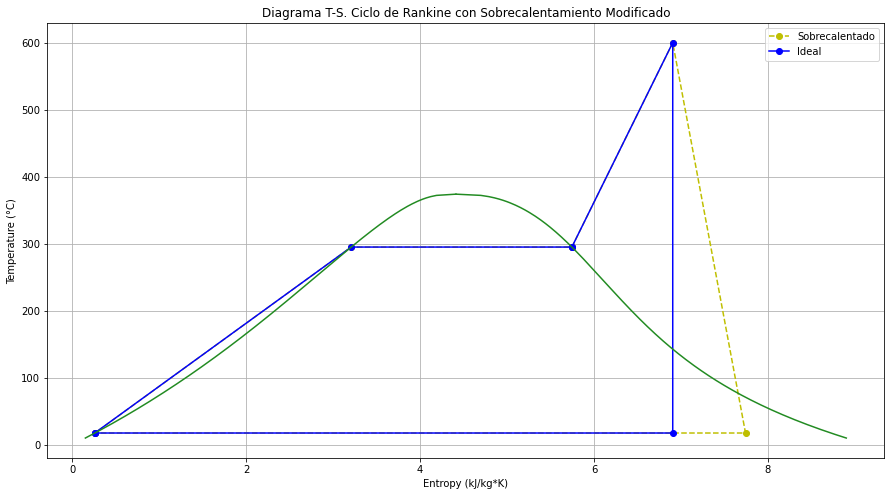

In [84]:
# Graficamos el nuevo ciclo Rankine

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(15.0,8.0))
 
S_ideal_calentadom=[S1,S1sm,S2ism,S3sm,S4sm,S5i,S1]
T_ideal_calentadom=[T1,T1sm,T2ism,T3sm,T4ism,T5i,T1]   
S_calentadom=[S1,S1sm,S2rsm,S3sm,S4rsm,S5sm,S1]
T_calentadom=[T1,T1sm,T2rsm,T3sm,T4rsm,T5sm,T1]

plt.plot(S_calentadom, T_calentadom, 'yo--')
plt.plot(S_ideal_calentadom, T_ideal_calentadom, 'bo-')
plt.legend(('Sobrecalentado','Ideal'))
plt.xlabel('Entropy (kJ/kg*K)')
plt.ylabel('Temperature (°C)')
plt.title('Diagrama T-S. Ciclo de Rankine con Sobrecalentamiento Modificado')
plt.grid()

# Representación de la línea
npt = np.linspace(10,647.096-273.15,200) # range of temperatures
svap = [s for s in [tx2s(t, 1) for t in npt]]
sliq = [s for s in [tx2s(t, 0) for t in npt]]
plt.plot(svap, npt, 'Forestgreen')
plt.plot(sliq, npt, 'Forestgreen')

In [85]:
# Recordemos los parámetros del ciclo sobrecalentado anterior

print('Ciclo sobrecalentado 1 (parámetros anteriores)')
print('Wcycle =', Wcycle,'MW')
print ('mrs =',mrs, 'kg/s')
print ('Qoutrs =', Qoutrs, 'MW')
print ('Qinrs =', Qinrs,'MW' )
print ('Wtrs', Wtrs, 'MW')
print ('Wprs', Wprs, 'MW')
print ('Rendimiento térmico  =',Rendimientors, '%')
print('######')
print('Ciclo sobrecalentado modificado')
print ('mrsm =',mrsm, 'kg/s')
print ('Qoutrsm =', Qoutrsm, 'MW')
print ('Qinrsm =', Qinrsm,'MW' )
print ('Wtrsm', Wtrsm, 'MW')
print ('Wprsm', Wprsm, 'MW')
print ('Rendimiento térmico  =',Rendimientorm, '%')

Ciclo sobrecalentado 1 (parámetros anteriores)
Wcycle = 100000 MW
mrs = 97.1281015825126 kg/s
Qoutrs = 200.11770983617356 MW
Qinrs = 300.11770983617356 MW
Wtrs 100.91940520185511 MW
Wprs 0.9194052018551155 MW
Rendimiento térmico  = 33.32025959234042 %
######
Ciclo sobrecalentado modificado
mrsm = 73.18356061090961 kg/s
Qoutrsm = 159.11799654323272 MW
Qinrsm = 259.1179965432328 MW
Wtrsm 100.86001776196525 MW
Wprsm 0.8600177619652466 MW
Rendimiento térmico  = 38.59245646155473 %


Se observa que con estos nuevos parámetros se ha mejorado un poco el rendimiento térmico del ciclo. Este aumento del rendimiento reside en las mejoras del ciclo básico de Rankine que se han planteado, como aumentando la presión máxima y temperatura máxima y disminuyendo la presión mínima del ciclo. Se ha escogido aumentar la presión de entrada a la turbina a 10 MPa y la temperatura de entrada a 600 ºC. En este nuevo cliclo, el vapor entra al condensador a una presión de 0,002 MPa. El trabajo neto del ciclo se ha mantenido en 100 MW, y los rendimientos de la turbina (ηt) y de la bomba (ηp) son ambos 0.85. De este modo, las modificaciones en los parámetros se justifican solo con los pequeños cambios realizados. Los datos obtenidos muestran una disminución del flujo másico, así como también valores de calor ligeramente menores. Los trabajos de la turbina y de la bomba también disminuyen pero, sin embargo, el rendimiento térmico del ciclo incrementa un 5,272%. 